# Solar Data Analysis and prediction


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# lets read the dataset
data = pd.read_csv("solar_data.csv")

In [ ]:
data.head()

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,27-04-2022 15:32,43.349172,12.790256,0.533333,118.786620,707.53384,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.14572
1,27-04-2022 15:34,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.71452
2,27-04-2022 15:36,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.24568
3,27-04-2022 15:38,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.06504
4,27-04-2022 15:40,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.89576


In [ ]:
drop_column = ['Air_Temp','Relative_Humidity','RTD_1','RTD_2','RTD_3','RTD_4','RTD_5','Array_Voltage','Array_Current']
data = data.drop(drop_column, axis=1)

In [ ]:
data.head()

,Timestamp,Wind_Speed,Wind_Direction,Solar_Radiation,Power_Generated
0,27-04-2022 15:32,0.533333,118.786620,707.53384,430.14572
1,27-04-2022 15:34,1.866667,84.681408,710.46328,430.71452
2,27-04-2022 15:36,2.866667,40.807156,695.51016,430.24568
3,27-04-2022 15:38,0.000000,66.390848,696.24472,433.06504
4,27-04-2022 15:40,2.266667,2.127408,674.05752,431.89576


In [ ]:
data.shape

(1009, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        1009 non-null   object 
 1   Wind_Speed       1009 non-null   float64
 2   Wind_Direction   1009 non-null   float64
 3   Solar_Radiation  1009 non-null   float64
 4   Power_Generated  1009 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.5+ KB


# Visualizing the Data

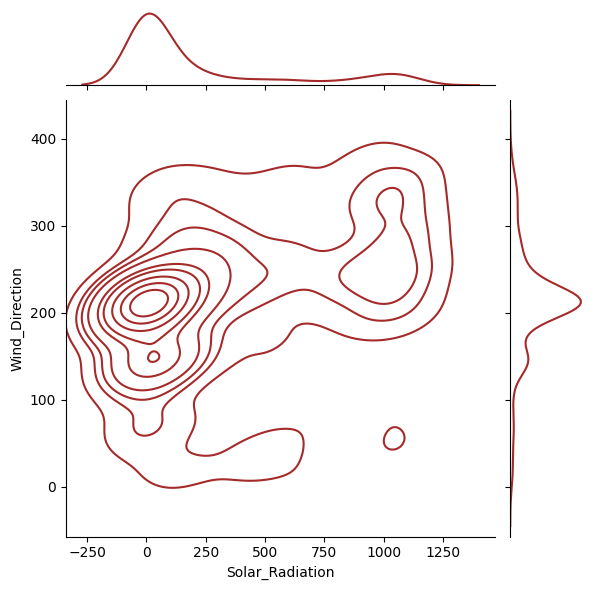

In [ ]:
sns.jointplot(x='Solar_Radiation',y='Wind_Direction',data = data, kind = 'kde' ,color = 'brown')

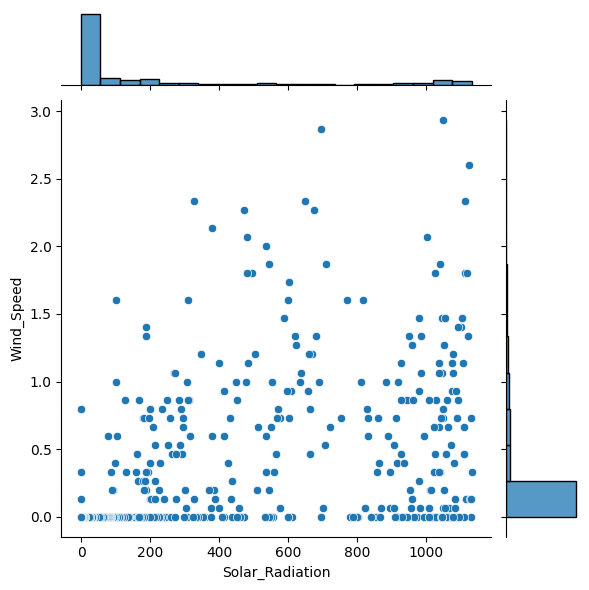

In [ ]:
sns.jointplot(x='Solar_Radiation',y='Wind_Speed',data = data)

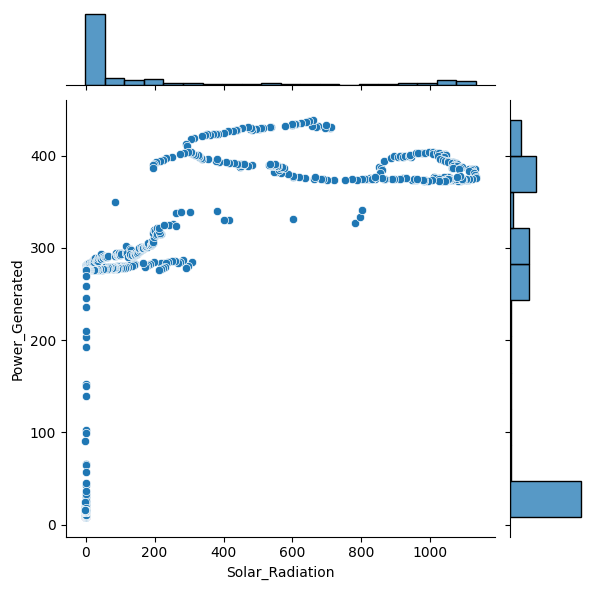

In [ ]:
sns.jointplot(x='Solar_Radiation',y='Power_Generated',data = data)

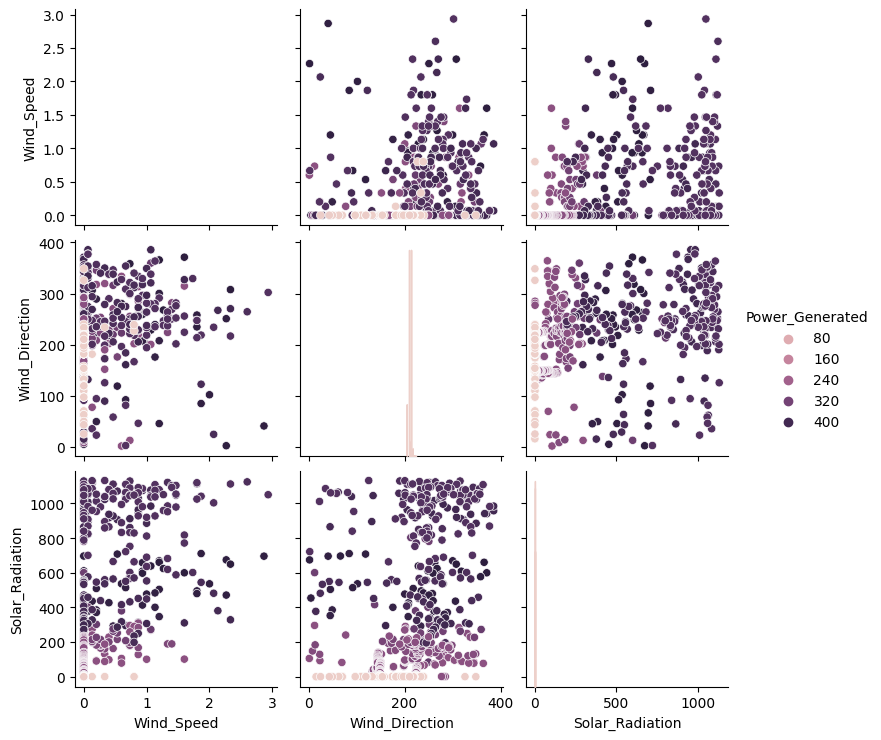

In [ ]:
sns.pairplot(data, hue= 'Power_Generated')

In [ ]:
# Removing the columns which is not in need
waste1 = data.pop("Timestamp")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wind_Speed       1009 non-null   float64
 1   Wind_Direction   1009 non-null   float64
 2   Solar_Radiation  1009 non-null   float64
 3   Power_Generated  1009 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


# Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

numericals = ['Wind_Speed','Wind_Direction','Solar_Radiation','Power_Generated']

data[numericals] = scaler.fit_transform(data[numericals])

In [ ]:
data.head()

,Wind_Speed,Wind_Direction,Solar_Radiation,Power_Generated
0,0.814157,-1.481229,1.352771,1.485977
1,3.883984,-2.031127,1.360968,1.489400
2,6.186353,-2.738537,1.319129,1.486579
3,-0.413772,-2.326036,1.321185,1.503541
4,4.804932,-3.362193,1.259106,1.496506


In [ ]:
#waste2 = data.pop("Wind_Direction")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wind_Speed       1009 non-null   float64
 1   Wind_Direction   1009 non-null   float64
 2   Solar_Radiation  1009 non-null   float64
 3   Power_Generated  1009 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


In [ ]:
Y = data.pop('Power_Generated')

X = data

In [ ]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
#building the RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from keras.optimizers import Adam  # Import Adam optimizer from Keras
from keras.callbacks import EarlyStopping

x = np.array(X_train)
y = np.array(Y_train)

n_splits = 6

mse_scores = []
mae_scores = []
r2_scores = []

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_number = 1
for train_index, val_index in kf.split(x):
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create and compile the model
    reg = Sequential()
    reg.add(LSTM(units=64, activation='relu', input_shape=(None, 1)))
    reg.add(Dense(units=1))
    optimizer = Adam(learning_rate=0.01)
    reg.compile(optimizer=optimizer, loss='mean_squared_error')

    # To prevent overfitting
    #early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience=20, restore_best_weights=True)

    history = reg.fit(x_train, y_train, batch_size=32, epochs=150, validation_split=0.2, verbose = 0)


    # Make predictions on the validation data
    y_pred = reg.predict(x_val)

    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print(f"Fold {fold_number}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R^2):", r2)
    print()

    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

    fold_number += 1

# Calculate the average scores across all folds
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)

print("Average Mean Squared Error (MSE) across folds:", average_mse)
print("Average Mean Absolute Error (MAE) across folds:", average_mae)
print("Average R-squared (R^2) across folds:", average_r2)

5/5 [==============================] - 0s 3ms/step


Fold 1:
Mean Squared Error (MSE): 0.05863546634697778
Mean Absolute Error (MAE): 0.1529982120966593
R-squared (R^2): 0.9411412924734095

5/5 [==============================] - 0s 3ms/step


Fold 2:
Mean Squared Error (MSE): 0.0807345795047491
Mean Absolute Error (MAE): 0.17872359457471707
R-squared (R^2): 0.9186039493324607

5/5 [==============================] - 0s 3ms/step


Fold 3:
Mean Squared Error (MSE): 0.08412973638233694
Mean Absolute Error (MAE): 0.1668916426315419
R-squared (R^2): 0.9174203882344052

5/5 [==============================] - 0s 4ms/step


Fold 4:
Mean Squared Error (MSE): 0.08515372045603607
Mean Absolute Error (MAE): 0.1744367061898062
R-squared (R^2): 0.9095536250941706

5/5 [==============================] - 0s 4ms/step


Fold 5:
Mean Squared Error (MSE): 0.08251463963528302
Mean Absolute Error (MAE): 0.17376096079949294
R-squared (R^2): 0.9164017023089881

5/5 [==============================] - 0s 3ms/step
Fold 6:
Mean Squared Error (MSE): 0.05871868920904797
Mean Absolute Error (MAE): 0.1551957661753567
R-squared (R^2): 0.9428135344733939

Average Mean Squared Error (MSE) across folds: 0.07498113858907181
Average Mean Absolute Error (MAE) across folds: 0.167001147077929
Average R-squared (R^2) across folds: 0.9243224153194712


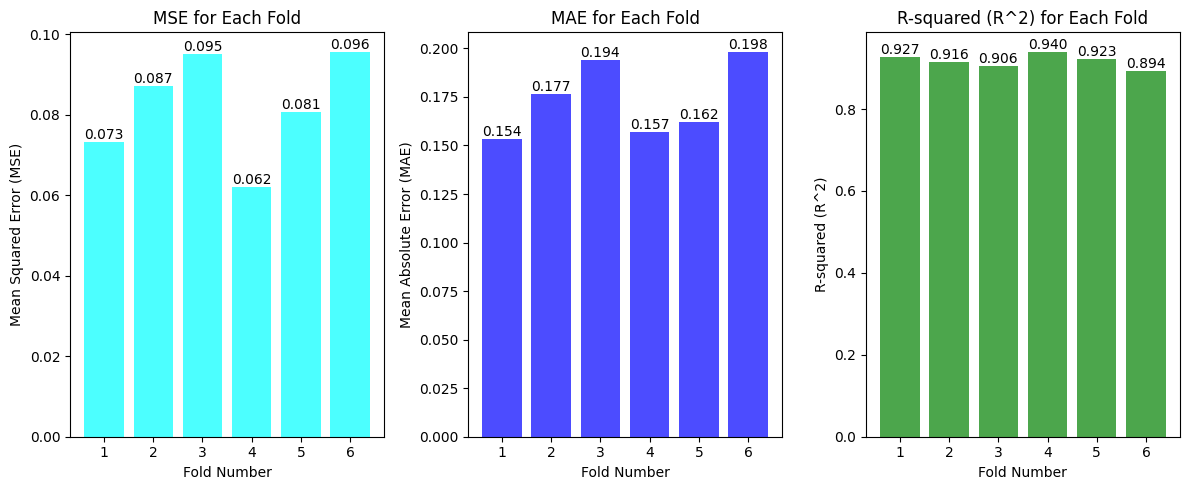

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your fold-wise metrics data
fold_numbers = np.arange(1, 7)
mse_values = [0.07314576617364693, 0.08710321665877829, 0.09519737324690059, 0.06209343289968595, 0.08068369305584923, 0.09572021994909478]
mae_values = [0.15352347424592863, 0.1767148913623761, 0.19406282359782737, 0.15707778850567947, 0.16209918353285224, 0.1983534424123427]
r_squared_values = [0.9270545283133274, 0.9161703547368666, 0.9057108174587679, 0.9404065810909115, 0.9226546706163531, 0.8935015845065901]

# Create subplots for each metric
plt.figure(figsize=(12, 5))

# Plot MSE
plt.subplot(131)
bars = plt.bar(fold_numbers, mse_values, color='cyan', alpha=0.7)
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Each Fold')
for bar, mse in zip(bars, mse_values):
    plt.annotate(f'{mse:.3f}', (bar.get_x() + bar.get_width() / 2, mse), ha='center', va='bottom')

# Plot MAE
plt.subplot(132)
bars = plt.bar(fold_numbers, mae_values, color='blue', alpha=0.7)
plt.xlabel('Fold Number')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Each Fold')
for bar, mae in zip(bars, mae_values):
    plt.annotate(f'{mae:.3f}', (bar.get_x() + bar.get_width() / 2, mae), ha='center', va='bottom')

# Plot R-squared (R^2)
plt.subplot(133)
bars = plt.bar(fold_numbers, r_squared_values, color='green', alpha=0.7)
plt.xlabel('Fold Number')
plt.ylabel('R-squared (R^2)')
plt.title('R-squared (R^2) for Each Fold')
for bar, r_squared in zip(bars, r_squared_values):
    plt.annotate(f'{r_squared:.3f}', (bar.get_x() + bar.get_width() / 2, r_squared), ha='center', va='bottom')

plt.tight_layout()
plt.show()



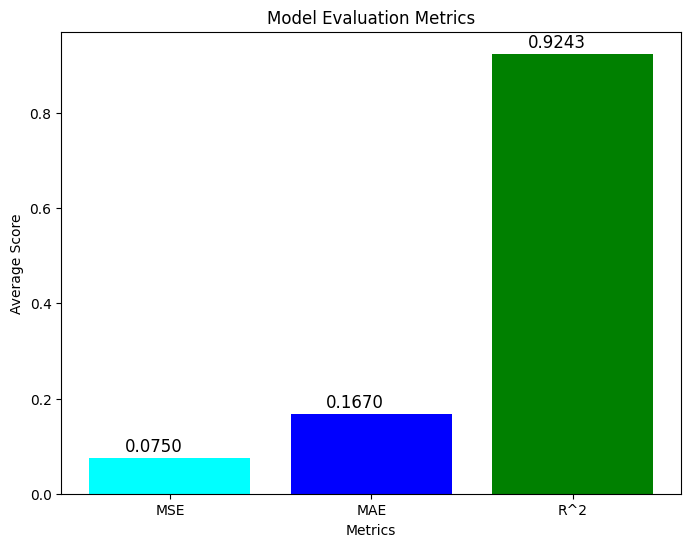

In [ ]:
import matplotlib.pyplot as plt

# Your average scores
labels = ['MSE', 'MAE', 'R^2']
scores = [average_mse, average_mae, average_r2]

# Create a bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(labels, scores, color=['cyan', 'blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Average Score')
plt.title('Model Evaluation Metrics')

# Annotate the values on top of the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.08, score + 0.005, f'{score:.4f}', ha='center', va='bottom', fontsize=12)

plt.show()


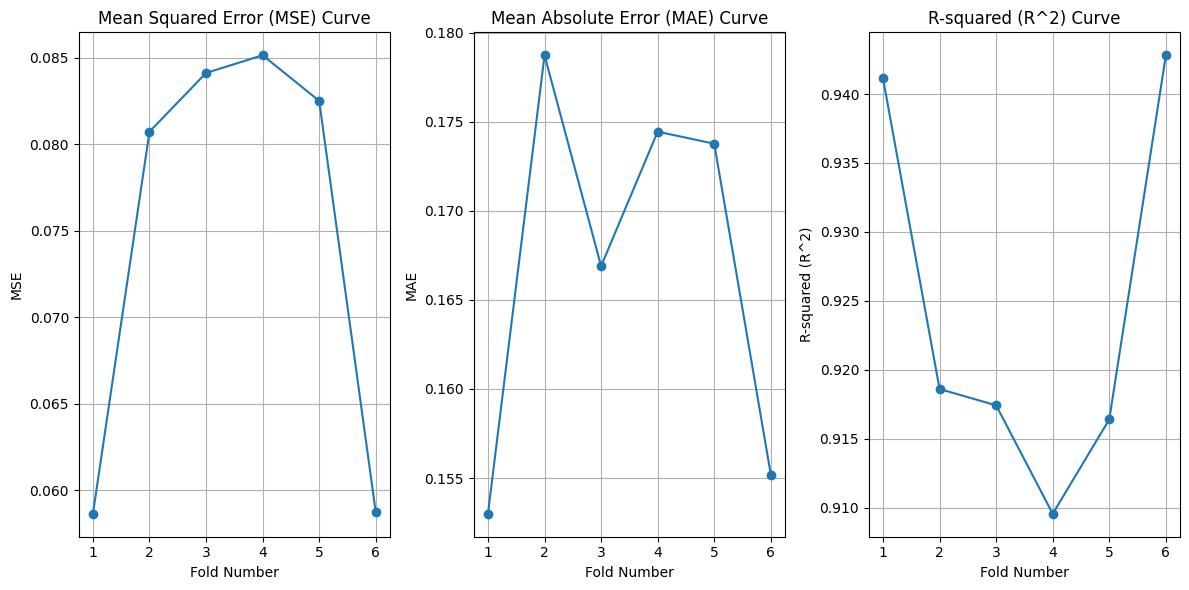

In [ ]:
import matplotlib.pyplot as plt

# Plot the MSE, MAE, and R-squared (R^2) curves
plt.figure(figsize=(12, 6))

# Plot Mean Squared Error (MSE) curve
plt.subplot(1, 3, 1)
plt.plot(range(1, n_splits + 1), mse_scores, marker='o', linestyle='-')
plt.title('Mean Squared Error (MSE) Curve')
plt.xlabel('Fold Number')
plt.ylabel('MSE')
plt.grid(True)
plt.xticks(range(1, n_splits + 1))

# Plot Mean Absolute Error (MAE) curve
plt.subplot(1, 3, 2)
plt.plot(range(1, n_splits + 1), mae_scores, marker='o', linestyle='-')
plt.title('Mean Absolute Error (MAE) Curve')
plt.xlabel('Fold Number')
plt.ylabel('MAE')
plt.grid(True)
plt.xticks(range(1, n_splits + 1))

# Plot R-squared (R^2) curve
plt.subplot(1, 3, 3)
plt.plot(range(1, n_splits + 1), r2_scores, marker='o', linestyle='-')
plt.title('R-squared (R^2) Curve')
plt.xlabel('Fold Number')
plt.ylabel('R-squared (R^2)')
plt.grid(True)
plt.xticks(range(1, n_splits + 1))

plt.tight_layout()
plt.show()



# Create a heatmap to visualize the correlation matrix between features


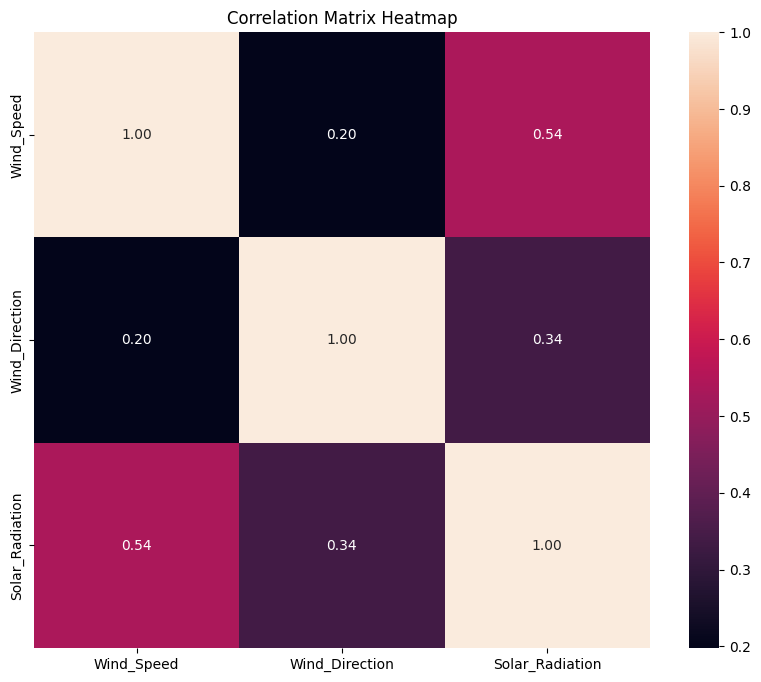

In [ ]:

correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix Heatmap')
sns.heatmap(correlation_matrix, fmt=".2f", annot=True, square=True);



Text(0.5, 0, 'Epochs')

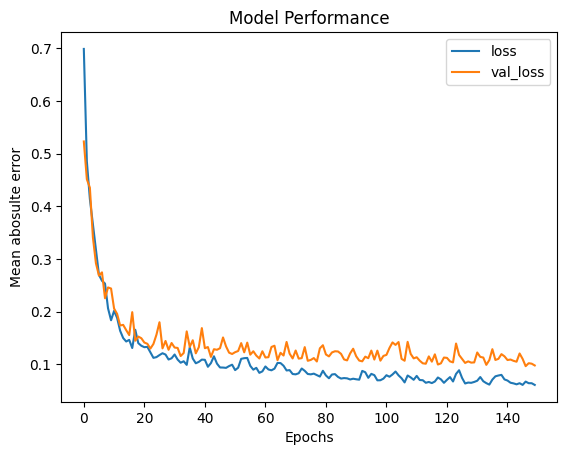

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model Performance")
plt.ylabel("Mean abosulte error")
plt.xlabel("Epochs")

In [ ]:
reg.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0726


0.0725749284029007

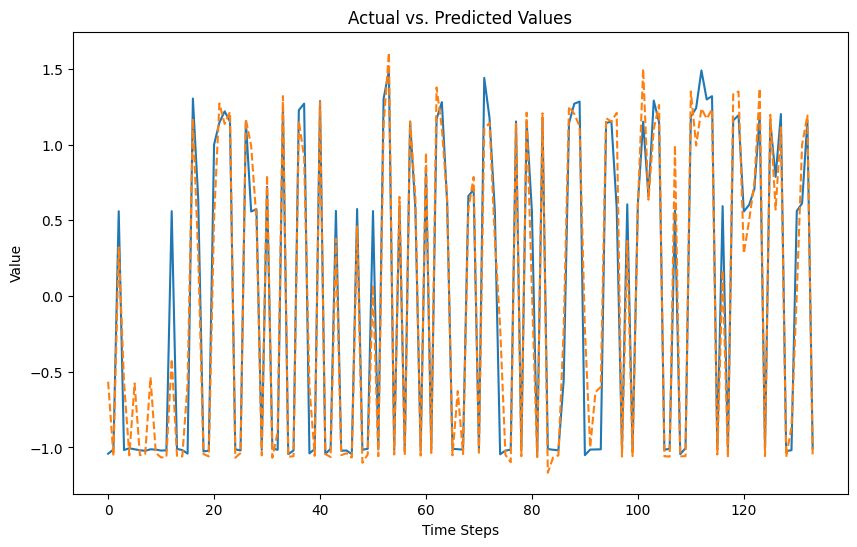

In [ ]:
plt.figure(figsize=(10, 6))
#plt.subplot(1,2,1)
plt.plot(y_val, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')

# plt.subplot(1,2,2)
# plt.scatter(y_val, y_pred)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Scatter Plot of Actual vs. Predicted Values')
# plt.grid()
plt.show()


# Create a residuals plot to visualize the errors or residuals (the differences between actual and predicted values) and check if they have any patterns or trends.


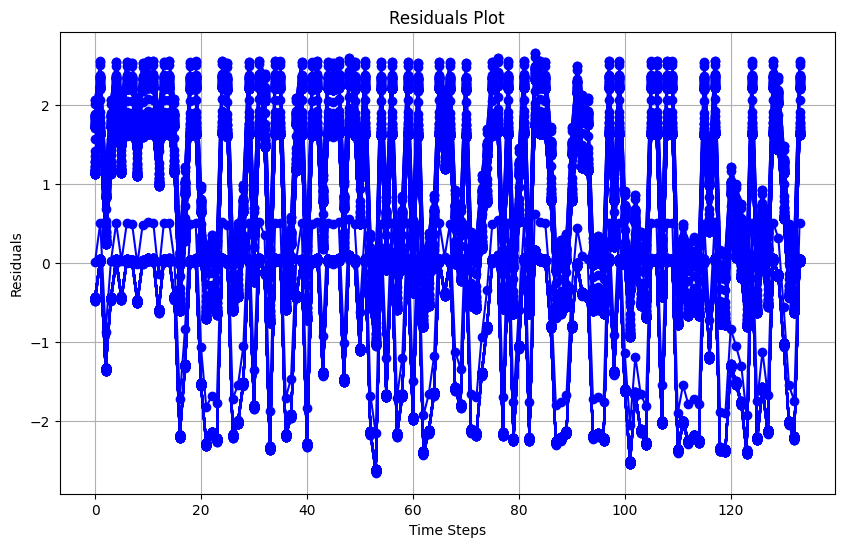

In [ ]:

residuals = y_val - y_pred

plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o', linestyle='-', color='b')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid()
plt.show()


# Visualize the model's learning process

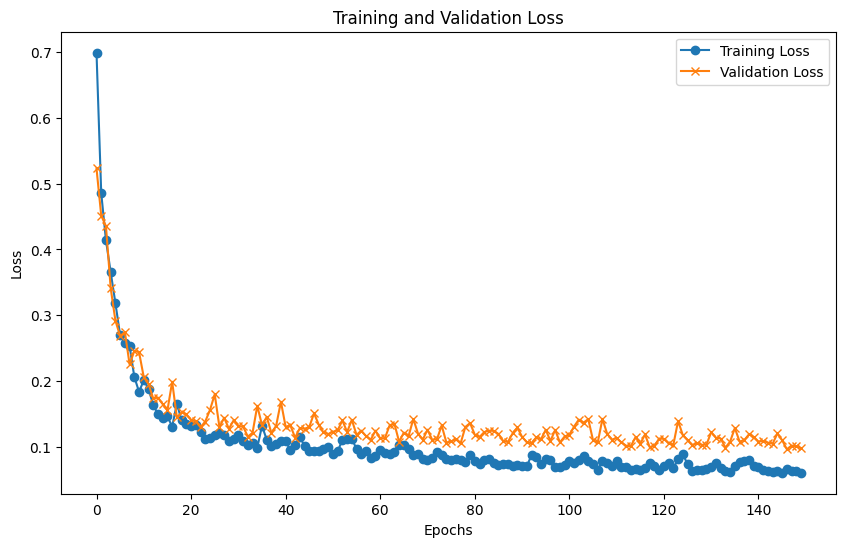

In [ ]:


train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Plot a histogram or density plot of the residuals to understand their distribution.


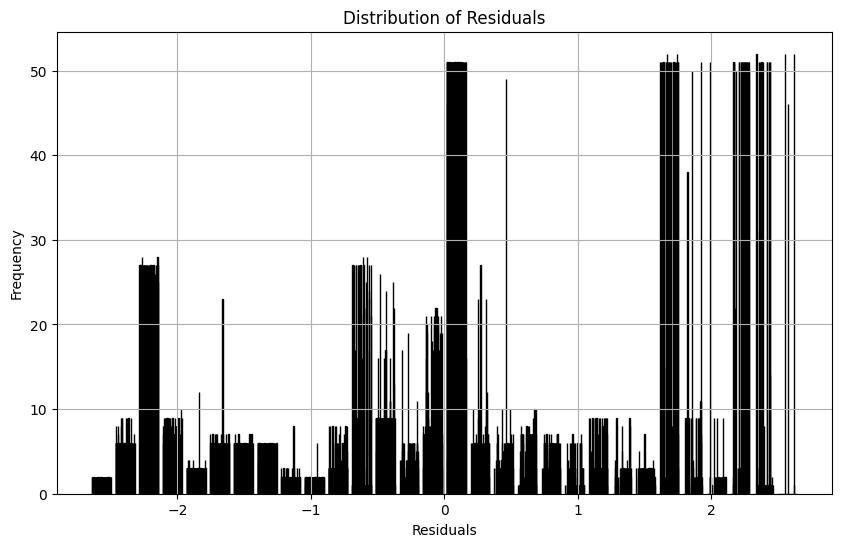

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid()
plt.show()


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, Y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index = data.columns[:])
lasso_coeff.sort_values('Feature Importance', ascending=False)

,Feature Importance
Solar_Radiation,0.671457
Wind_Speed,0.119723
Wind_Direction,-0.010025


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Feature Importance'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Feature Importance'], **{})
chart

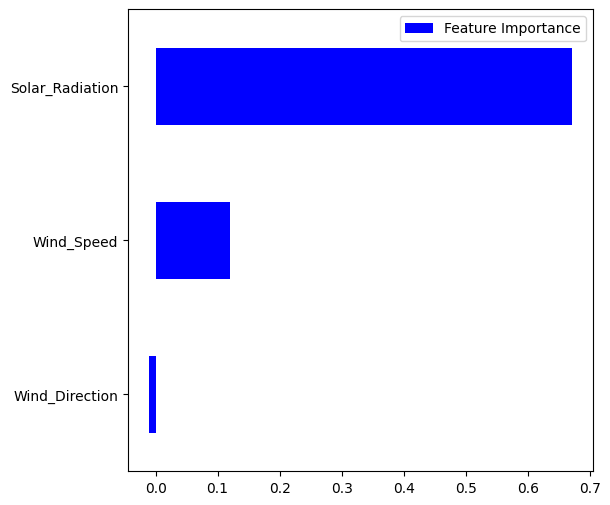

In [ ]:
Importance = lasso_coeff[lasso_coeff['Feature Importance']!=0].sort_values('Feature Importance').plot(kind='barh',figsize=(6,6), cmap='winter')